In [225]:
#downloading dataset
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-05 16:15:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-05 16:15:31 (2.32 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [226]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
#read dataset
data = pd.read_csv('drug200.csv')

In [228]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [229]:
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# Exploratory Data Analysis

In [230]:
#descriptive stats
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [231]:
# Null check

data.isnull().values.any()

False

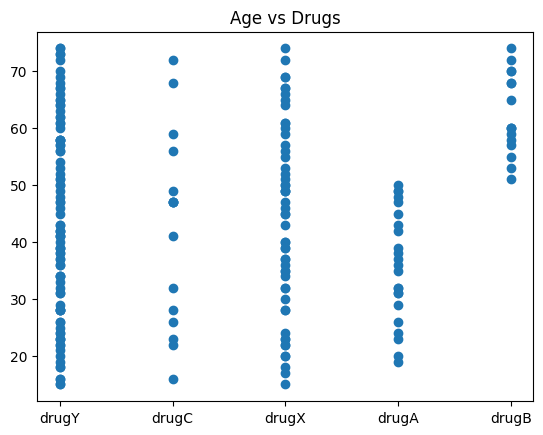

In [232]:
#age vs drug

plt.scatter(data['Drug'],data['Age'])
plt.title('Age vs Drugs')
plt.show()

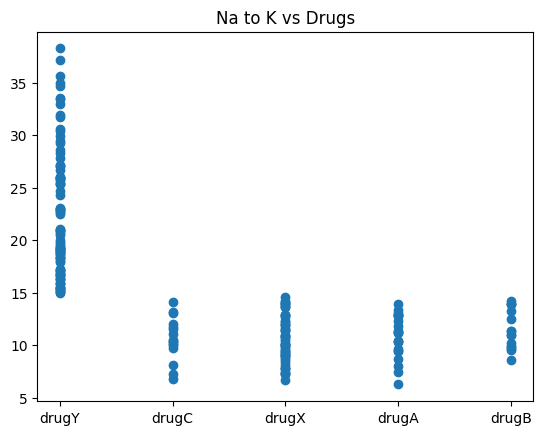

In [233]:
plt.scatter(data['Drug'],data['Na_to_K'])
plt.title('Na to K vs Drugs')
plt.show()

In [234]:
pd.crosstab(data.Sex,data.Drug)

Drug,drugA,drugB,drugC,drugX,drugY
Sex,,,,,
F,9,6,7,27,47
M,14,10,9,27,44


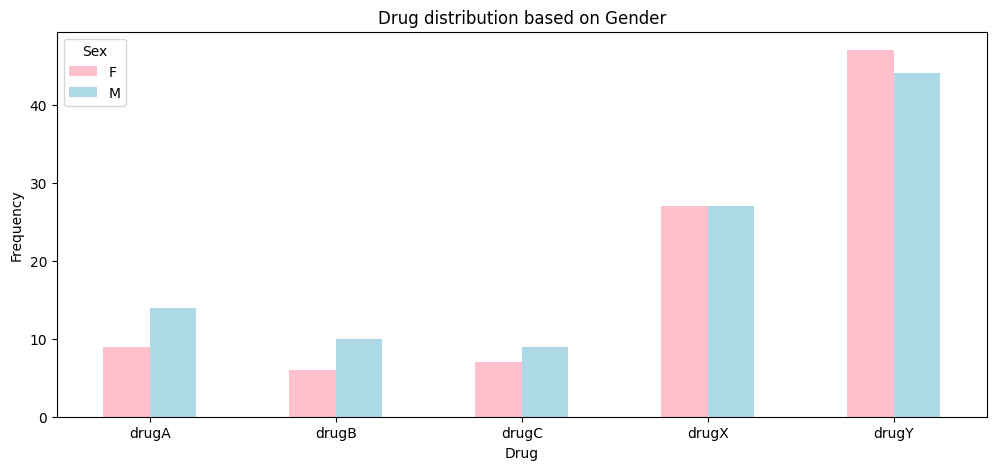

In [235]:
pd.crosstab(data.Drug,data.Sex).plot(kind="bar",figsize=(12,5), color = ['pink','lightblue'])
plt.title('Drug distribution based on Gender')
plt.xlabel('Drug')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [236]:
pd.crosstab(data.Drug,data.BP)

BP,HIGH,LOW,NORMAL
Drug,,,
drugA,23,0,0
drugB,16,0,0
drugC,0,16,0
drugX,0,18,36
drugY,38,30,23


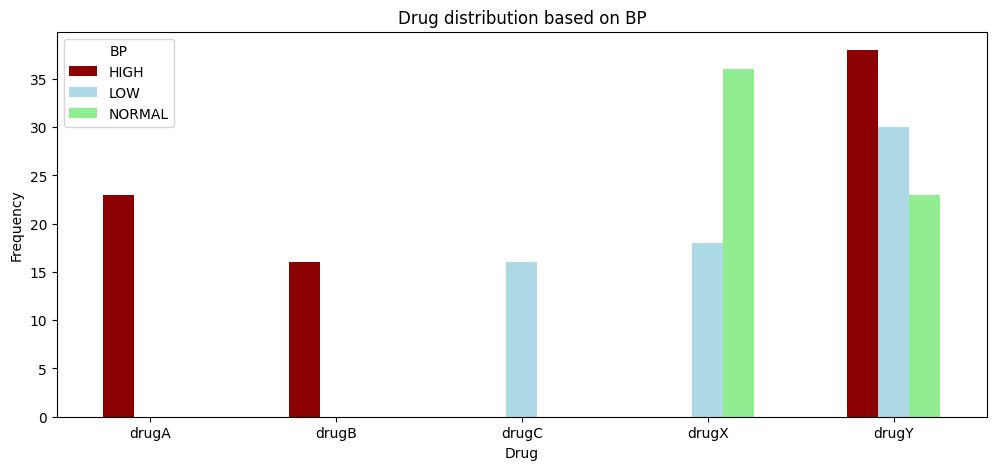

In [237]:
pd.crosstab(data.Drug,data.BP).plot(kind="bar",figsize=(12,5), color =['darkred', 'lightblue', 'lightgreen'])
plt.title('Drug distribution based on BP')
plt.xlabel('Drug')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [238]:
pd.crosstab(data.Drug,data.Cholesterol)

Cholesterol,HIGH,NORMAL
Drug,,
drugA,12,11
drugB,8,8
drugC,16,0
drugX,20,34
drugY,47,44


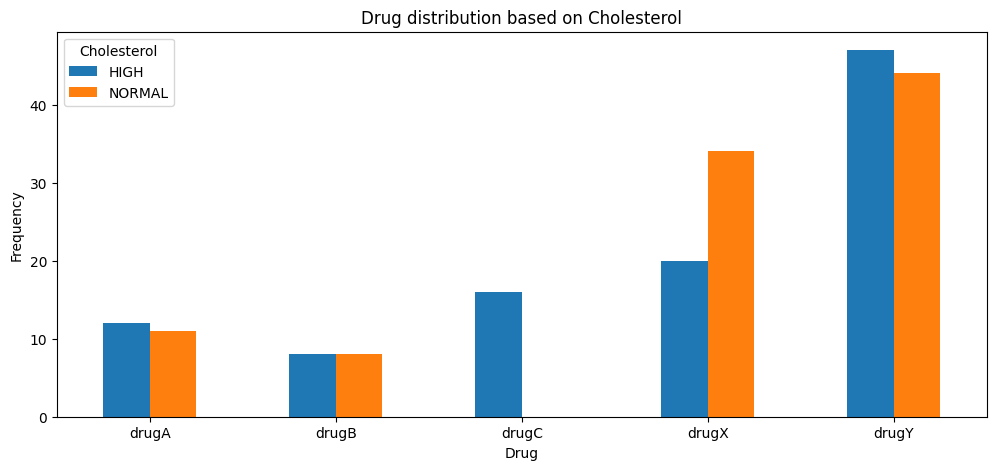

In [239]:
pd.crosstab(data.Drug,data.Cholesterol).plot(kind="bar",figsize=(12,5))
plt.title('Drug distribution based on Cholesterol')
plt.xlabel('Drug')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing


In [240]:
#choosing feature and target variables
x = data.drop(["Drug"], axis=1)
y = data["Drug"]

In [241]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)

np.unique(y)

array([0, 1, 2, 3, 4])

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [243]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [244]:
x_train.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
134,42,21.036,1,0,1,0,0,1,0
66,29,12.856,0,1,1,0,0,1,0
26,31,30.366,0,1,1,0,0,1,0
113,65,13.769,1,0,0,1,0,0,1
168,51,23.003,1,0,0,1,0,0,1


In [245]:
# from imblearn.over_sampling import SMOTE
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

# Logistic Regression


In [246]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LR_Acc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_Acc*100))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3
           3       1.00      0.93      0.96        14
           4       0.86      1.00      0.93        19

    accuracy                           0.90        40
   macro avg       0.77      0.65      0.70        40
weighted avg       0.91      0.90      0.90        40

[[ 2  1  0  0  0]
 [ 0  0  0  0  1]
 [ 0  0  2  0  1]
 [ 0  0  0 13  1]
 [ 0  0  0  0 19]]
Logistic Regression accuracy is: 90.00%


# Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [249]:
y_pred= classifier.predict(x_test)

In [250]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [251]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]


In [252]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [253]:
DT_Acc = accuracy_score(y_test,y_pred)
print('Decision Tree accuracy is: {:.2f}%'.format(DT_Acc*100))

Decision Tree accuracy is: 100.00%


[Text(0.625, 0.9, 'x[1] <= 14.829\nentropy = 2.008\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(0.5, 0.7, 'x[4] <= 0.5\nentropy = 1.846\nsamples = 88\nvalue = [20, 15, 13, 40, 0]'),
 Text(0.25, 0.5, 'x[5] <= 0.5\nentropy = 0.804\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.375, 0.3, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.5, 'x[0] <= 50.5\nentropy = 0.985\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]')]

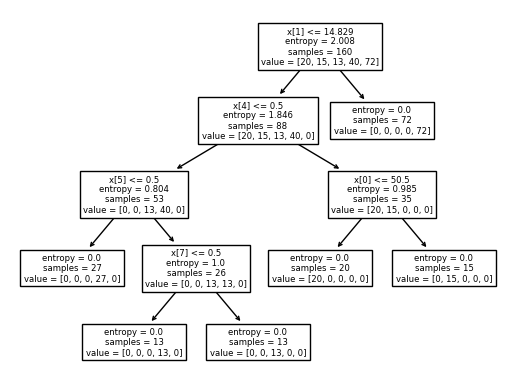

In [254]:
from sklearn.tree import plot_tree
plot_tree(classifier)

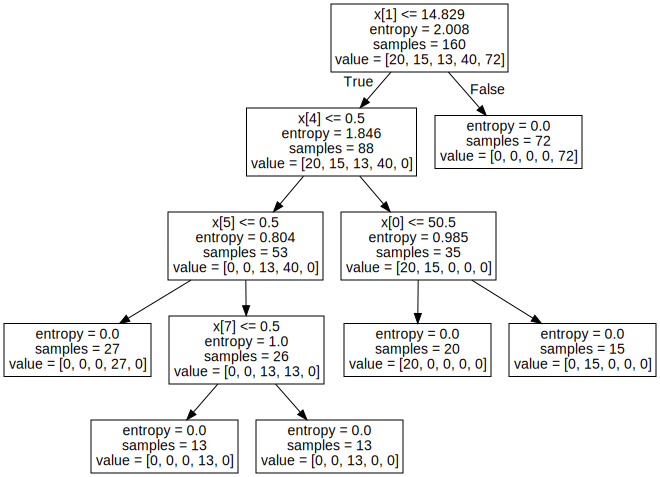

In [255]:
import graphviz # Refer to https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224
from sklearn import tree
dot_data = tree.export_graphviz(classifier)
graph = graphviz.Source(dot_data)
graph

# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state=0) # only 10 trees will b ok as dataset is only 400+ records. Default is 100.
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [257]:
y_pred = classifier.predict(x_test)

In [258]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]


In [259]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [260]:
RF_Acc = accuracy_score(y_test,y_pred)
print('Random Forest accuracy is: {:.2f}%'.format(RF_Acc*100))

Random Forest accuracy is: 100.00%


# KNN

In [261]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8, p=2, metric='minkowski') # by default n_neighbors = 5
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [262]:
y_pred = classifier.predict(x_test)

In [263]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 1  0  0  2  0]
 [ 0  1  0  0  0]
 [ 0  0  0  3  0]
 [ 2  3  0  9  0]
 [ 0  0  0  0 19]]


In [264]:
KNN_Acc = accuracy_score(y_test,y_pred)
print('KNN accuracy is: {:.2f}%'.format(KNN_Acc*100))

KNN accuracy is: 75.00%


In [265]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3
           3       0.64      0.64      0.64        14
           4       1.00      1.00      1.00        19

    accuracy                           0.75        40
   macro avg       0.45      0.60      0.48        40
weighted avg       0.73      0.75      0.73        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SVM

In [266]:
from sklearn.svm import SVC
svr_lin = SVC(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train,y_train)
y_pred_lin= svr_lin.predict(x_test)

In [267]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred_lin)
print(cm)

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]


In [268]:
cr = classification_report(y_test,y_pred_lin)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [269]:
SVM_Acc = accuracy_score(y_test,y_pred_lin)
print('SVM accuracy is: {:.2f}%'.format(SVM_Acc*100))

SVM accuracy is: 100.00%


# Naive Bayes Classifiers

##Categorical

In [270]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)

y_pred = NBclassifier1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
CNB_Acc = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy is: {:.2f}%'.format(CNB_Acc*100))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.25      1.00      0.40         1
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00        14
           4       1.00      0.79      0.88        19

    accuracy                           0.85        40
   macro avg       0.67      0.82      0.69        40
weighted avg       0.91      0.85      0.87        40

[[ 1  2  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 2  1  1  0 15]]
Categorical Naive Bayes accuracy is: 85.00%


##Gaussian

In [271]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GNB_Acc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(GNB_Acc*100))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.50      1.00      0.67         1
           2       0.50      1.00      0.67         3
           3       0.78      1.00      0.88        14
           4       1.00      0.42      0.59        19

    accuracy                           0.73        40
   macro avg       0.66      0.88      0.69        40
weighted avg       0.83      0.72      0.70        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 3  1  3  4  8]]
Gaussian Naive Bayes accuracy is: 72.50%


Compare and evaluate the Model results and find the best model

In [279]:
result = pd.DataFrame({'Model':('Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Categorical Naive Bayes', 'Gaussian Naive Bayes'),
                       'Accuracy_Score': (LR_Acc, DT_Acc, RF_Acc, KNN_Acc, SVM_Acc, CNB_Acc, GNB_Acc)})
display(result)

,Model,Accuracy_Score
0,Logistic Regression,0.900
1,Decision Tree,1.000
2,Random Forest,1.000
3,KNN,0.750
4,SVM,1.000
5,Categorical Naive Bayes,0.850
6,Gaussian Naive Bayes,0.725


**Decison Tree, Random Forest and SVM are the best models with Accuracy at 100%**